# 第１章 線形回帰

In [1]:
import numpy as np
from numpy.random import randn
from matplotlib import pyplot as plt

## 1.1 最小二乗法

- 説明変数は x のひとつだけ。
- y = ax + b + $\epsilon$ に従ってデータを100点生成。
- モデル式
$$
y = \hat{a} x + \hat{b}
$$
として、$\hat{a}$ および $\hat{b}$ を推定。

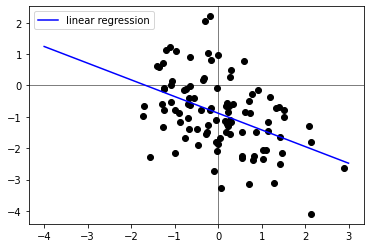

In [7]:
def min_sq(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(x-x_bar, y-y_bar) / np.linalg.norm(x-x_bar)**2
    beta_0 = y_bar - beta_1*x_bar
    return [beta_1, beta_0]

N = 100
a = randn(1)
b = randn(1)
x = randn(N)
y = a*x + b + randn(N)
a1, b1 = min_sq(x, y)
x_seq = np.arange(-4, 4)
y_pre = x_seq * a1 + b1
plt.scatter(x, y, c='black')
plt.axhline(y=0, c='black', linewidth=0.5)
plt.axvline(x=0, c='black', linewidth=0.5)
plt.plot(x_seq, y_pre, c='blue', label='linear regression')
plt.legend(loc='upper left')

## 1.2 重回帰

- 説明変数を $\boldsymbol{x}_1$ 〜 $\boldsymbol{x}_N$ とする。

- $\boldsymbol{x}_i$ の次元は $p+1$ 次元。

- 誤差関数を

$$
L = ||y - X \beta|| ^2
$$

としたとき、最小二乗法による推定値は、$\boldsymbol{X}^T \boldsymbol{X}$ が逆行列を持つ場合、

$$
\hat{\boldsymbol\beta}
=
(\boldsymbol{X}^{T} \boldsymbol{X})^{-1}
\boldsymbol{X}^T
\boldsymbol{y}
$$

In [13]:
n = 100; p = 2
beta = np.array([1, 2, 3])
x = randn(n, 2)
y = beta[0] + beta[1]*x[:,0] + beta[2]*x[:,1] + randn(n)
X = np.insert(x, 0, 1, axis=1)
print("true beta: {}".format(beta))
pre_beta = np.linalg.inv(X.T@X)@X.T@y
print("predicted beta: {}".format(pre_beta))

true beta: [1 2 3]
predicted beta: [1.04086693 2.26361093 3.0140618 ]


## 1.3 $\hat{\beta}$ の分布

- 回帰モデルを

$$
\boldsymbol{y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}
$$

とおく。ここで、

$$
f(\epsilon)
=
\prod_{i=1}^{N} f_i(\epsilon_i)
=
\frac{1}{(2 \pi \sigma^2)^{N/2}}
\exp{(- \frac{\boldsymbol{\epsilon}^T \boldsymbol{\epsilon}}{2\sigma^2})}
$$

- モデル式をさきほどの $\hat{\beta}$ の式に代入して、

$$
\hat{\boldsymbol\beta}
=
(\boldsymbol{X}^{T} \boldsymbol{X})^{-1}
\boldsymbol{X}^T
(\boldsymbol{X\beta}+\boldsymbol{\epsilon})
=
\boldsymbol{\beta} +
(\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}
$$

より、期待値は、

$$
E[\boldsymbol{\hat{\beta}}] = \boldsymbol{\beta}
$$

共分散行列の式変形は教科書を参照。

- 結局、

$$
\boldsymbol{\hat{\beta}}
\sim
\mathcal{N}(\boldsymbol{\beta}, \sigma^2 (\boldsymbol{X}^T \boldsymbol{X})^{-1})
$$